# INFO 2950 Fall 2025 Main Project 


**Research Question:** Is there a negative association between unemployment rate and opinions about ethnicities?

In [3]:
# imported like similar to homeworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
# import duckdb
import requests
from bs4 import BeautifulSoup
import time

## Upload/Import data

In [4]:
unemployment_df = pd.read_csv("UnemploymentData.csv", header = None)
ethno_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

#check
print(unemployment_df.head(15))
ethno_df.head(10)
#Note : real data starts at the 11th line of data set of first

                                                   0   \
0   Labor Force Statistics from the Current Popula...   
1                                 Original Data Value   
2                                                 NaN   
3                                          Series Id:   
4                                 Seasonally Adjusted   
5                                       Series title:   
6                                 Labor force status:   
7                                       Type of data:   
8                                                Age:   
9                                              Years:   
10                                                NaN   
11                                               Year   
12                                               1964   
13                                               1965   
14                                               1966   

                          1    2    3    4    5    6    7    8    9    10  \
0         

,Demographics,Subgroup,Total Cases,Year,Whites,Blacks,Chicanos/Hispanics,Asian-Americans
0,All,All,1532,1964,84.7,63.8,NaN,NaN
1,All,All,1273,1966,84.4,63.2,NaN,NaN
2,All,All,1503,1968,81.1,64.7,NaN,NaN
3,All,All,1469,1970,77.2,61.5,NaN,NaN
4,All,All,2120,1972,78.2,64.0,NaN,NaN
5,All,All,1525,1974,79.1,65.5,NaN,NaN
6,All,All,1869,1976,73.7,60.8,55.5,NaN
7,All,All,1382,1980,77.4,64.2,57.8,NaN
8,All,All,1321,1982,72.8,63.8,NaN,NaN
9,All,All,1902,1984,74.2,64.2,59.4,NaN


## Cleaning Data


In [ ]:
ethno_df = pd.read_csv("The Guide to Public Opinion and Electoral Behavior.csv")

ethno_avg = ethno_df[ethno_df['Subgroup'] == 'All']
print(np.unique(ethno_df['Subgroup']))
ethno_df = ethno_df[ethno_df['Subgroup'].isin(['White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 'Other/Multiple races, non-Hispanic'])]
# ethno_avg = ethno_df.groupby('Year', as_index = False).mean(numeric_only = True)

# the above line is wrong bc the subgroups are not just the different races
# either way the average is included in the dataset under the 'All' subgroup

# print(ethno_df.head())
print(ethno_avg.head())
print(ethno_df.head())

['18-29' '18-29 Democrats' '18-29 Hispanics' '18-29 Independents'
 '18-29 Republicans' '18-29 blacks' '18-29 in Nonsouth' '18-29 in South'
 '18-29 men' '18-29 others' '18-29 whites' '18-29 women' '30-44'
 '30-44 Democrats' '30-44 Hispanics' '30-44 Independents'
 '30-44 Republicans' '30-44 blacks' '30-44 in Nonsouth' '30-44 in South'
 '30-44 men' '30-44 others' '30-44 whites' '30-44 women' '45-59'
 '45-59 Democrats' '45-59 Hispanics' '45-59 Independents'
 '45-59 Republicans' '45-59 blacks' '45-59 in Nonsouth' '45-59 in South'
 '45-59 men' '45-59 others' '45-59 whites' '45-59 women' '60+'
 '60+ Democrats' '60+ Hispanics' '60+ Independents' '60+ Republicans'
 '60+ blacks' '60+ in Nonsouth' '60+ in South' '60+ men' '60+ others'
 '60+ whites' '60+ women' 'All' 'Black Democrats' 'Black Independents'
 'Black Republicans' 'Black men' 'Black women' 'Black, non-Hispanic'
 'Blacks in Nonsouth' 'Blacks in South' 'College grad+'
 'College grad+ Democrats' 'College grad+ Hispanics'
 'College grad+ I

In [6]:
new_header = unemployment_df.iloc[11].tolist()
unemployment_data = unemployment_df[12:].copy()
unemployment_data.columns = new_header
unemployment_data.reset_index(drop = True, inplace = True)

if 'Year' not in unemployment_data.columns:
    unemployment_data.rename(columns={unemployment_data.columns[0]: 'Year'}, inplace = True)

# same type(numbers that we can work with)
month_cols = [col for col in unemployment_data.columns if col not in ['Year', 'Average Unemployment Rate']]
for col in month_cols:
    unemployment_data[col] = pd.to_numeric(unemployment_data[col], errors = 'coerce')

# yearly average unemployment rate
unemployment_data['Average Unemployment Rate'] = unemployment_data[month_cols].mean(axis = 1)

unemployment_data['Year'] = pd.to_numeric(unemployment_data['Year'], errors = 'coerce')

unemployment_cleaned = unemployment_data[['Year', 'Average Unemployment Rate']].dropna()

unemployment_cleaned['Year'] = unemployment_cleaned['Year'].astype(int)

#over lapping years
# voting_years = [1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,2000, 2004, 2008, 2012, 2016, 2020, 2024]
# unemplo_voting = unemployment_cleaned[unemployment_cleaned['Year'].isin(voting_years)]


unemployment_cleaned.head(20)

,Year,Average Unemployment Rate
0,1964,5.158333
1,1965,4.508333
2,1966,3.791667
3,1967,3.841667
4,1968,3.558333
5,1969,3.491667
6,1970,4.983333
7,1971,5.950000
8,1972,5.600000
9,1973,4.858333


In [7]:
merged_df = pd.merge(ethno_df, unemployment_cleaned, on='Year', how='inner').sort_values('Year').reset_index(drop  = True)
merged_df.to_csv("merged_ethno_unemployment.csv", index = False)
# print out first couple

merged_df.head(20)

,Demographics,Subgroup,Total Cases,Year,Whites,Blacks,Chicanos/Hispanics,Asian-Americans,Average Unemployment Rate
0,race,"White, non-Hispanic",1367,1964,86.7,60.7,NaN,NaN,5.158333
1,race,"Black, non-Hispanic",155,1964,66.8,91.9,NaN,NaN,5.158333
2,race,"Black, non-Hispanic",131,1966,72.9,87.9,NaN,NaN,3.791667
3,race,"White, non-Hispanic",1126,1966,85.7,60.4,NaN,NaN,3.791667
4,race,Hispanic,12,1966,NaN,NaN,NaN,NaN,3.791667
5,race,"Other/Multiple races, non-Hispanic",4,1966,NaN,NaN,NaN,NaN,3.791667
6,race,Hispanic,12,1968,NaN,NaN,NaN,NaN,3.558333
7,race,"White, non-Hispanic",1344,1968,82.4,61.7,NaN,NaN,3.558333
8,race,"Other/Multiple races, non-Hispanic",3,1968,NaN,NaN,NaN,NaN,3.558333
9,race,"Black, non-Hispanic",144,1968,67.9,91.5,NaN,NaN,3.558333


In [8]:
opins_on_whites = merged_df[['Average Unemployment Rate', 'Whites', 'Year']].dropna()
opins_on_whites.head()

,Average Unemployment Rate,Whites,Year
0,5.158333,86.7,1964
1,5.158333,66.8,1964
2,3.791667,72.9,1966
3,3.791667,85.7,1966
7,3.558333,82.4,1968


## Exploratory Data Analysis

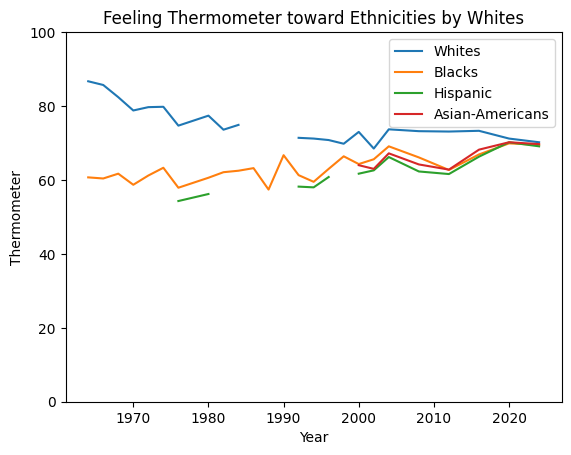

In [20]:
# This is just an experiment to see if we could recreate a chart seen in our source
# This confirmed that we understood the data correctly

x = white_opinions['Year']
y1 = white_opinions['Whites']
y2 = white_opinions['Blacks']
y3 = white_opinions['Chicanos/Hispanics']
y4 = white_opinions['Asian-Americans']

plt.plot(x, y1, label = 'Whites')
plt.plot(x, y2, label = 'Blacks')
plt.plot(x, y3, label = 'Hispanic')
plt.plot(x, y4, label = 'Asian-Americans')


plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Feeling Thermometer toward Ethnicities by Whites')
plt.legend()
plt.ylim(0, 100)
plt.show()

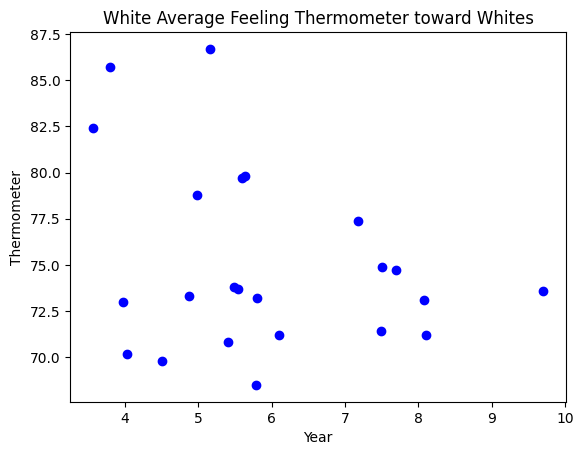

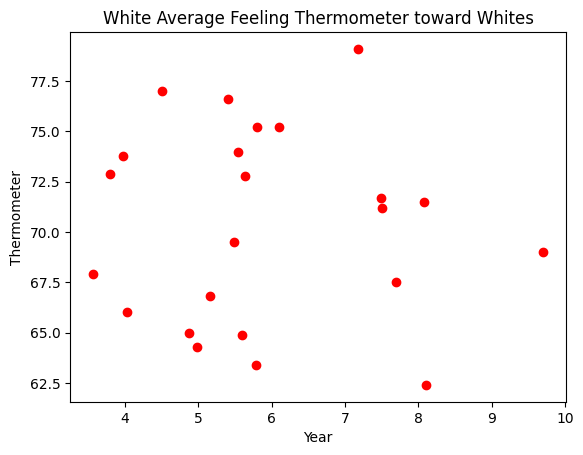

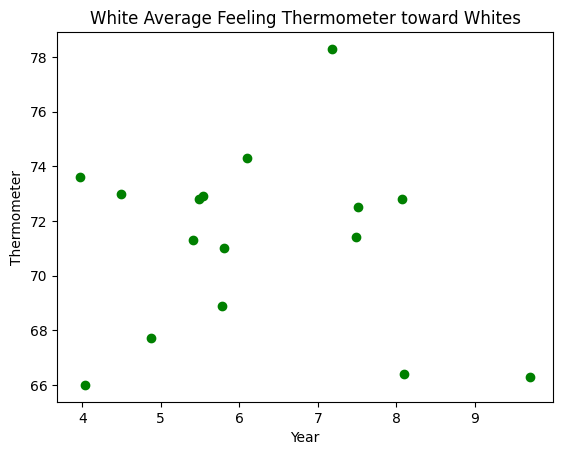

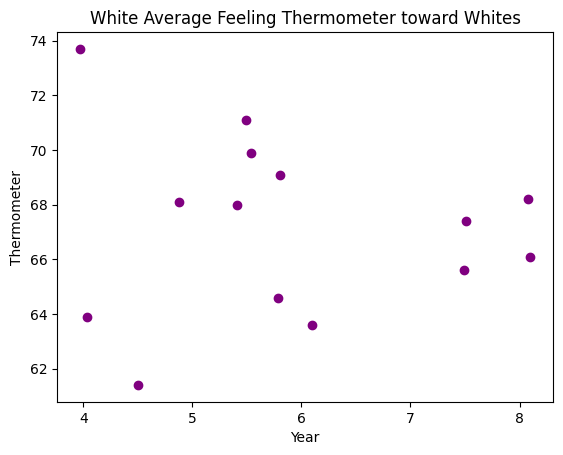

In [21]:
## Graphing the opinions of ethnicities towards white with respect to unemployment rate

white_opinions = merged_df[merged_df['Subgroup'] == 'White, non-Hispanic']
black_opinions = merged_df[merged_df['Subgroup'] == 'Black, non-Hispanic']
hisp_opinions = merged_df[merged_df['Subgroup'] == 'Hispanic']
other_opinions = merged_df[merged_df['Subgroup'] == 'Other/Multiple races, non-Hispanic']


plt.scatter(white_opinions['Average Unemployment Rate'], white_opinions['Whites'], label='White Opinions', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('White Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(black_opinions['Average Unemployment Rate'], black_opinions['Whites'], label='Black Opinions', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('White Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(hisp_opinions['Average Unemployment Rate'], hisp_opinions['Whites'], label='Hispanic Opinions', color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('White Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(other_opinions['Average Unemployment Rate'], other_opinions['Whites'], label='Other Opinions', color='purple', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('White Average Feeling Thermometer toward Whites')
plt.show()

# plt.xlabel('Unemployment Rate')
# plt.ylabel('Thermometer')
# plt.legend()
# plt.title('Feeling Thermometer toward Whites by Ethnicity')
# plt.show()

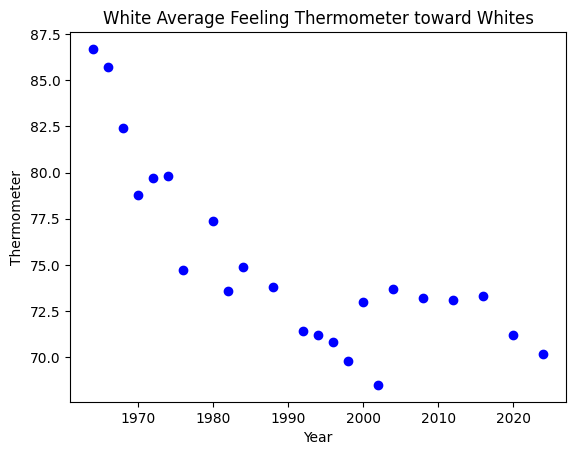

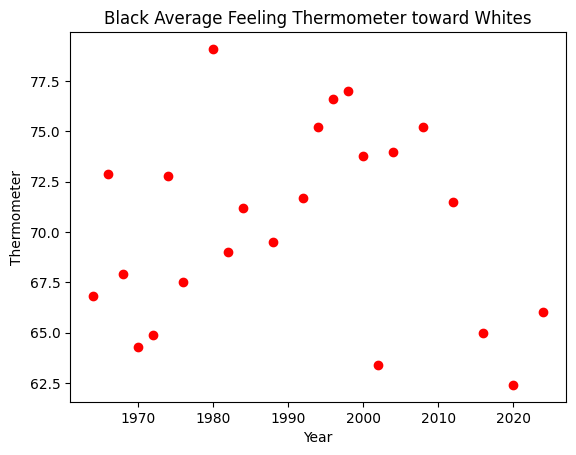

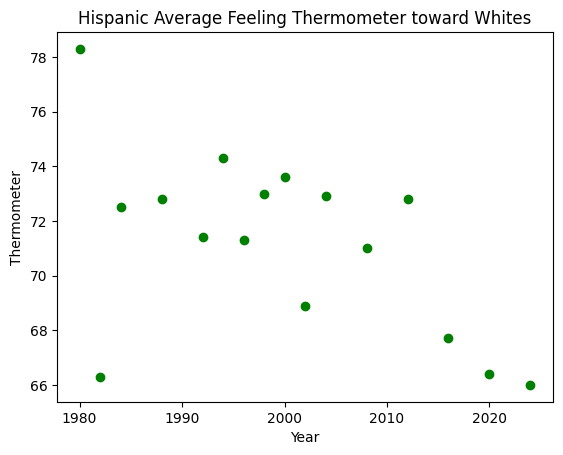

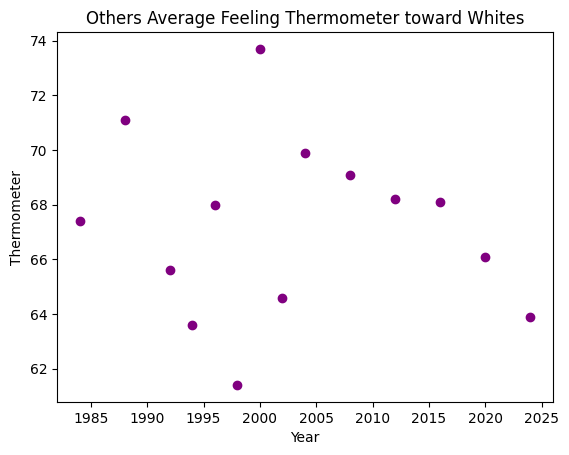

In [18]:
## Graphing the opinions of ethnicities towards white with respect to time

plt.scatter(white_opinions['Year'], white_opinions['Whites'], label='White Opinions', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('White Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(black_opinions['Year'], black_opinions['Whites'], label='Black Opinions', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Black Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(hisp_opinions['Year'], hisp_opinions['Whites'], label='Hispanic Opinions', color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Hispanic Average Feeling Thermometer toward Whites')
plt.show()

plt.scatter(other_opinions['Year'], other_opinions['Whites'], label='Other Opinions', color='purple', marker='o')
plt.xlabel('Year')
plt.ylabel('Thermometer')
plt.title('Others Average Feeling Thermometer toward Whites')
plt.show()

# Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Thermometer')
# plt.legend()
# plt.title('Feeling Thermometer toward Whites by Ethnicity')
# plt.show()

In [12]:
def corr_whites_year(group):
    group = group[['Year', 'Whites']].dropna()
    if group['Year'].nunique() > 1 and group['Whites'].nunique() > 1:
        r, p = pearsonr(group['Year'], group['Whites'])
        return pd.Series({'Correlation': r, 'p-value': p})
    else:
        return pd.Series({'Correlation': None, 'p-value': None})

correlation_by_subgroup = merged_df.groupby('Subgroup', group_keys=False).apply(
    corr_whites_year, include_groups=False
).reset_index()
print(correlation_by_subgroup)

                             Subgroup  Correlation   p-value
0                 Black, non-Hispanic    -0.038304  0.862244
1                            Hispanic    -0.552385  0.026498
2  Other/Multiple races, non-Hispanic    -0.119344  0.684470
3                 White, non-Hispanic    -0.794516  0.000006


In [13]:
r, p = pearsonr(opins_on_whites['Average Unemployment Rate'], opins_on_whites['Whites'])
print(f"Overall correlation: {r}, p-value: {p}")

Overall correlation: -0.1207237106398672, p-value: 0.2988941958899424


In [14]:
r, p = pearsonr(opins_on_whites['Year'], opins_on_whites['Whites'])
print(f"Overall correlation: {r}, p-value: {p}")

Overall correlation: -0.4382071386377164, p-value: 7.524053112405026e-05


In [15]:
average_by_subgroup = merged_df.groupby('Subgroup')['Whites'].mean().reset_index()
average_by_subgroup

,Subgroup,Whites
0,"Black, non-Hispanic",70.334783
1,Hispanic,71.200000
2,"Other/Multiple races, non-Hispanic",67.192857
3,"White, non-Hispanic",75.082609


## EDA Findings

We can see that there is a small, negative correlation between how highly people think of white people and unemployment rate. However, it is a small and insignificant correlation, as the correlation value is -0.12 and the p-value is quite high at 0.30.

A seemingly much more important variable is just the year, as there is correlation value is -0.44 with a p-value of about 0.00008. However, this likely underplays the correlation in this case, as for black opinions on white people, there seems to be a positive relationship about the mid-2000s and a negative relationship after it.

However, this is all just the opinions of different ethnicities about white people. Analysis still needs to be done on opinions about the other ethnicities.

## Limitations

There are many entries with missing data, espeically for hispanic and asian-american data. For instance, we see that thermometer data of white opinions about asian-americans was only collected after the year 2000. This limits the sample size for those groups and underrepresents them in pooled data, potentially leaving the results of pooled analysis as an inaccurate representation of the general population.

This ties into the other problem in that even for white people (the ethnicity with the most data), there are under 30 measured years, which could be too few datapoints for some types of analysis. In that scenario, we may be forced to pool the data to have enough data points, which again could lead to underrepresenting certain groups in the data.

Additionally, the choice of unemployment rate as a measure of the faring of US citizens economically was arbitrary, and there may be many other better indicators that would show a stronger relationship with the thermometer data. Potentially even a combination of these different variables could show a better relationship.

## Data Description

○ What are the observations (rows) and the attributes (columns)?

In the merged dataset, each row represents one U.S. year where ANES data was captured. The columns include the year itself, the average feeling thermometer ratings for Whites, Blacks, Chicanos/Hispanics, and Asian-Americans from the ANES survey (on a 0–100 scale), and the average unemployment rate for that same year. After cleaning and merging both datasets, each observation now captures a snapshot of how public sentiment toward different racial and ethnic groups aligns with the economic conditions of that year.

○ Why was this dataset created?

ANES: to provide a decades-long time series of political data

Unemployoment: as a part of long-term time series of American economic data

○ Who funded the creation of the dataset?

ANES: it was originally funded by the Social Science Research Council (SSRC) starting 1948 and has been funded by the National Science Foundation (NSF) since 1977

Unemployment: the US government

○ What processes might have influenced what data was observed and recorded and what was not?

- ANES: Data are collected through large-scale national surveys conducted every two years since 1964 (in the case of our specific data). Because they are self-reported, responses may be influenced by social desirability bias or changes in public willingness to express prejudice over time. The survey is only conducted every two years, meaning public sentiment between that time. Changes in question wording or sampling methods across decades could also influence comparability.
- unemployment Data:Collected monthly through the Current Population Survey (CPS), which samples approximately 60,000 U.S. households. While highly reliable,the BLS’s estimates are influenced by survey design,seasonal adjustments, and revisions to population benchmarks. Some underreporting may occur among informal or underemployed workers.


○ What preprocessing was done, and how did the data come to be in the form that you are using?

**Unemployment data:**
- The raw file contained metadata and monthly unemployment rates for each year (1964–2024).  
- We extracted the correct header row, converted monthly values to numeric, and computed a **mean annual unemployment rate**.  

**ANES data:**
- The original dataset includes multiple demographic subgroups (e.g., Party ID, Gender, Race, Region).  
- We selected the thermometer ratings toward each racial/ethnic group and computed the **average score per year** across all respondents.  
- The data were merged with the unemployment data using Years as the key.

- Data was matched by year in the inner merge. That was the overlapping information from both graphs.
- Merged dataset saved as merged_ethno_unemployment.csv for reproducibility.  
- Missing values removed or averaged where appropriate.
- graphed relationship between the 2 databases

○ If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

* For the ANES data,people filled out the surveys on purpose and knew their answers would be used for research about politics and social issues. All personal info was removed, and the data follows research privacy rules.
* For the unemployment data, it comes from the Bureau of Labor Statistics’ monthly household survey. The people who answer know it’s used to make national job and labor stats.Their answers stay private and anonymous before the data is shared.

○ Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box)

ANES: https://drive.google.com/file/d/1VFH3B7z9E5zRGBdcsGC6vQKR5-7jxuEr/view?usp=drive_link

Unemployment: https://drive.google.com/file/d/1haAEoGKuEPW-39RTB2X9z-0yUoFewnCf/view?usp=drive_link

## Questions for Reviewers

1. Would it be a good idea to introduce data about other economic markers? Would it maybe be a good idea to shift the project to being about the relationship between thermometer data and time, assuming it's not too late for that?
2. How should we address the underrepresentation problem? Should we just take data from overlapping years and in doing that exclude large amounts of data and limit the time range significantly?
3. How should we treat thermometer data from and/or about different races? When should we separate or pool them or do stratified sampling?